In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Connecting Dots with Regression Methods

## Linear Regression OLS
$ y = X\beta$
- $y =$ vector of n responses, is a linear combination of the input of $x$.
- $x =$ vector of the input variable also length n, represent a set of input variables, $x$ is a matrix of n rows/observation and m columns/features.
- $\beta$ = slope response (how much the response $y$ increases for each 1-unit increase in the value of $x$). Is a vector set of slopes or coefficients which, when multiplied by the features, give the output.  
<br>

**What we do not know?**<br>
We have to assume that the response incorporates a while noise error term $\epsilon$.<br>
This $\epsilon$ is a normal distribution with mean $0$ and a constant variance for all data points.<br>
To solve for the coefficients $\beta$ in this model:
<br>

> **Assumptions:**
> - The error term $\epsilon$ should have constant residual variance, meaning the fit shpuld have constant residual variance.
> - The residual, which is the difference between the fitted and actual response, $y$ is assumed to have constants variance ove the range of its values, **if it is not the case, i.e if smaller values of $y$ have smallers errors than larger values, then it suggest we are not appropriately incorporating a source of error in our model**
> - The explanation is because the only variation left after we account for the predictors $X$ should be the error term $\delta$, and it have to have constant variance.
> - The residuals are assumed to be un-correlated based on the predictors $X$. This is important because we are trying to model a line between the average of the response data points at each predictor value. **Would be accurate if we assume that the residual error $\epsilon$ is randomly distributed about $0$**.
> - The predictors are assumed not to be collinear, **correlated with one other**. If that happens they cancel each other out when we mae a linear combination of each other matrix $X$. Because in the derivation of $\beta$, to calculate the coefficients we need to take the inverse, so if columns in the matrix exactly cancel each other out, then the matrix  is reank **deficient** and has no inverse, recall that **if a matrix is full rank, its columns(rows) cannot be represented by a linear combination of the other columns(rows)**. Ranks deficient does not have an inverse.
<br>

So why does OLS formula for $\beta$ represent the best estimate of the coefficients: Because is that this value minimizes the squared error.  
The **Gaus Markov Theorem, states that the OLS stimate is the Best Linear Unbiased Estimator (BLUE) of the coefficients $\beta$**. We assume we an error that deviates form the real values, so this BLUE is then the set of coefficients $\beta$ that have the smallest mean error from the real values.


In [2]:
news = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Python-Advanced-Predictive-Analytics/master/Module%202/MasteringPredictiveAnalyticswithPython_Code/B04881_04_code/OnlineNewsPopularity.csv")
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#news.columns
news.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

In [4]:
news.columns = [x.strip() for x in news.columns]
news.columns
news.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Are the range of the values in each column very different?  
The columns have maximum values in the hundreds, thousands, cero and one.  
And even the value we are trying to predict, **shares**, has a very wide distribution. Let's see.


<Axes: ylabel='Frequency'>

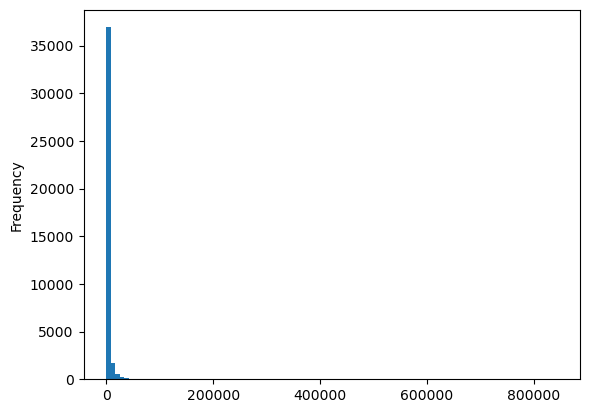

In [5]:
news['shares'].plot(kind='hist',bins=100)

Why is this a problem?  
Recall: when we fit a line through a dataset, we are finding the solution to:  
$y=X\beta$  
> - $y$ is a repsonse variable, in this case "shares".  
> - $\beta$ is the vector slopes by which we increase/decrease the value of the response for 1 unit change a column of $X$.
> - If the response is logarithmically distributed, then the coefficients will be biased to accomodate extremely large points in order to minimize the total error of the fit given by:

$\sum_{i=1}^n (y-X\beta)^2 $

**Solution**
> To reduce the effect, we can logarithmically transform the response variable, it makes a distribution that looks more like a normal curve:


<Axes: ylabel='Frequency'>

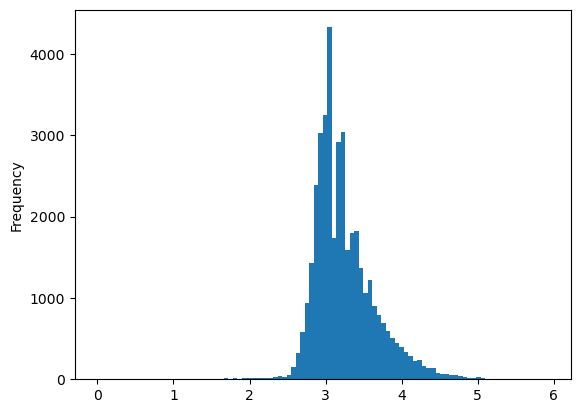

In [6]:
#######previous code
#news['shares'].plot(kind='hist',bins=100)
#######now changing with log to accommodate so that with have a more a normal distribution
news['shares'].map(lambda x: np.log10(x)).plot(kind='hist',bins=100)

The rule of thumb holds true for the predictor variables, $X$.  
- If some predictors are larger than other, the solution will mainly emphasize those with the largest range.  
- They will contribute most to the overall error.  
- We can systemically scale all of our variables with the logarithmic transformation.
- To do this we need to remove all the variable that are not useful, like "URL" is a textual data.

**STEP 1**

In [7]:
#the undefined before the first : means we are leaving out the first column, 
#only taken from timedelta until shares.
news.head()
news_trimmed_features = news.drop(['url'],axis=1) #axis1 columns

In [8]:
news_trimmed_features.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


**STEP 2**
- Identify the variable we want to transform, with the rule of Thumb (their max, given by the 8th row(index 7) of the describe() method is >1, indicating that they are not in the range 0 to 1).
- Apply the log method to transform.
- Keep in mind that is necessary to add the number 1 to each logarithmically transformed variable so that we avoid errors for taking the algorithm of 0.

In [9]:
news_trimmed_features.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [10]:
#what it makes is to convert all the values in the *max* row greater than 1 with log method in a fit value.
log_values = list(news_trimmed_features.columns[news_trimmed_features.describe().reset_index().loc[7][1:]>1])
for n in log_values:
    news_trimmed_features[n] = np.log10(news_trimmed_features[n]+1)

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
news_trimmed_features.describe()

C:\Users\ros22\anaconda3\envs\py310\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,2.426203,1.049144,2.557982,0.182947,0.292131,0.221263,0.936584,0.525009,0.484858,0.173900,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3.246652
std,0.386018,0.082907,0.545231,0.044798,0.052978,0.048385,0.351538,0.300835,0.422896,0.295531,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,0.403752
min,0.954243,0.477121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.301030
25%,2.217484,1.000000,2.392697,0.167574,0.301030,0.211051,0.698970,0.301030,0.301030,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,2.976350
50%,2.531479,1.041393,2.612784,0.187302,0.301030,0.228009,0.954243,0.602060,0.301030,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,3.146438
75%,2.734800,1.113943,2.855519,0.206474,0.301030,0.244185,1.176091,0.698970,0.698970,0.301030,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,3.447313
max,2.864511,1.380211,3.928140,2.846337,3.018284,2.813581,2.484300,2.068186,2.110590,1.963788,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,5.925983


**STEP 3**  
- To analyse to see if there are infinite or nonexistent values.
- Remove them.
- To do that we are going to convert infinite values to the placeholder 'not a number' or NaN.

In [12]:
news_trimmed_features.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_s

In [13]:
#to see in total how many null values there are.
news_trimmed_features.isnull().sum().sum()

0

In [14]:
news_trimmed_features.count()

timedelta                        39644
n_tokens_title                   39644
n_tokens_content                 39644
n_unique_tokens                  39644
n_non_stop_words                 39644
n_non_stop_unique_tokens         39644
num_hrefs                        39644
num_self_hrefs                   39644
num_imgs                         39644
num_videos                       39644
average_token_length             39644
num_keywords                     39644
data_channel_is_lifestyle        39644
data_channel_is_entertainment    39644
data_channel_is_bus              39644
data_channel_is_socmed           39644
data_channel_is_tech             39644
data_channel_is_world            39644
kw_min_min                       39644
kw_max_min                       39644
kw_avg_min                       39644
kw_min_max                       39644
kw_max_max                       39644
kw_avg_max                       39644
kw_min_avg                       39644
kw_max_avg               

In [15]:
news_trimmed_features = news_trimmed_features.replace([np.inf, -np.inf], np.nan)

**STEP 4**  
With the *fill* function to substitute the NaN placeholder with the proceeding value in the column or is possible to use a fixed value, but in this case with the preceedinf value. 

In [16]:
news_trimmed_features = news_trimmed_features.fillna(method='pad')

In [17]:
news_trimmed_features.isnull().sum().sum()

0

**STEP 5**  
Now split the data into a response variable ('shares') and the features (all the rest os the columns). These are the inputs in the **regression models** described later.

In [18]:
news_response = news_trimmed_features['shares']

In [19]:
news_response.head()

0    2.773786
1    2.852480
2    3.176381
3    3.079543
4    2.704151
Name: shares, dtype: float64

In [20]:
news_trimmed_features = news_trimmed_features.loc[:,'timedelta':'abs_title_sentiment_polarity']
news_trimmed_features.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,2.864511,1.113943,2.342423,0.221047,0.30103,0.258969,0.69897,0.477121,0.301030,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,2.864511,1.000000,2.408240,0.205406,0.30103,0.253325,0.60206,0.301030,0.301030,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,2.864511,1.000000,2.326336,0.197316,0.30103,0.221118,0.60206,0.301030,0.301030,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,2.864511,1.000000,2.725912,0.177187,0.30103,0.221580,1.00000,0.000000,0.301030,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,2.864511,1.146128,3.030600,0.150955,0.30103,0.187772,1.30103,1.301030,1.322219,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


**STEP 6:**
- Let's take a look at variables that we did not transform logarithmically. 
- At this point is possible to find the linear model, but, the slopes for many of these will be extremely large or small. 
- That happens because, i.e one set of columns which we did not logarithmically transform encodes a $0/1$ value for whether a news article was published on a given day of the week.
- Another (Latent Dirichlet Allocation) gives a $0/1$ indicator for whether an article was tagged with a particular algorithmically defined topic.  
- In both cases, any row in the dataset must have the value 1 in one of the columns of these features, i.e the day of week has to take one of the seven potential values, why is this a problem?


- Recall that in most linear fits, we have both, a slope and an intercept, which is the offset of the line vertically from the origin (0,0) of the x-y plane.
- In a linear model we represent the multi-dimensional intercept by a column af all 1 in the feature matrix X, which will be added by defautl in many model-fitting libraries. 
- That means that a set of values, i.e the days of the week, since they are independent, **could form a linear combinations that exactly equeals the intercept column**, making it impossible to find a unique solution for the $\beta$ slopes.
- **This is the same issue as the last assumptionof LR, in which the matrix (XTX) is not invertible**, so, we cannot be obtaining a numerically stable solution for the coefficients. 
- The instability results in the unreasonably large coefficient values you will observe if you were to fit a regression model on this dataset.


SOLUTION: 
> We either need to leave out the intercept column(specifying accordingly the library), **or leave out one of the columns for these binary variables**. In this case fits better the second option, to drop one columns from each set of binary features.

**So the 5 point is to drop one columns from each set of binary features**.


In [21]:
news_trimmed_features.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,2.426203,1.049144,2.557982,0.182947,0.292131,0.221263,0.936584,0.525009,0.484858,0.173900,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,0.386018,0.082907,0.545231,0.044798,0.052978,0.048385,0.351538,0.300835,0.422896,0.295531,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,0.954243,0.477121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,2.217484,1.000000,2.392697,0.167574,0.301030,0.211051,0.698970,0.301030,0.301030,0.000000,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,2.531479,1.041393,2.612784,0.187302,0.301030,0.228009,0.954243,0.602060,0.301030,0.000000,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,2.734800,1.113943,2.855519,0.206474,0.301030,0.244185,1.176091,0.698970,0.698970,0.301030,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,2.864511,1.380211,3.928140,2.846337,3.018284,2.813581,2.484300,2.068186,2.110590,1.963788,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


Looking for the binary features

In [22]:
# gives the columns and  with binary 
#x = news_trimmed_features.loc[:, news_trimmed_features.isin([0,1]).all()]
#x

In [23]:
#to filter the column names with binary features
#c = news_trimmed_features.columns[news_trimmed_features.isin([0,1]).all()]
#c = news_trimmed_features.isin([0,1]).all()
#c
#m = c.sum()
#print(m)

In [24]:
#news_trimmed_features['LDA_00'].unique().tolist()

In [25]:
news_trimmed_features = news_trimmed_features.drop('weekday_is_sunday',1)

C:\Users\ros22\AppData\Local\Temp\ipykernel_11536\1056272052.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  news_trimmed_features = news_trimmed_features.drop('weekday_is_sunday',1)


In [26]:
news_trimmed_features = news_trimmed_features.drop('LDA_00',1) 
#this error happens because we already delete these columns, so if trying to get these columns after running this code that error happens.

C:\Users\ros22\AppData\Local\Temp\ipykernel_11536\1272921246.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  news_trimmed_features = news_trimmed_features.drop('LDA_00',1)


In [27]:
news_trimmed_features.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'is_weekend', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_

Now we are ready to fit a regression model to our data.  
**STEP 7**

**MODEL FITTING AND EVALUATION**  
From data to decissions - The goal of modelling can be either:  
> a) To predict a future response given historical data.  
> b) infer the statistical significance and effect of a given variable on an outcome.  

a) The first scenario, we will choose a subset of data to train our model, --- and then evaluate the goodness of fit of the linear model on an independent data set not used to derive the model parameters --- we want to validate that the trends represented by the model generalise beyond a particular set of data points. (queremos validar que las tendencias representadas por el modelo generalizan más allá de un conjunto concreto de puntos de datos) --- While the coefficient output of the linear model are interpretable, we are still more concerned in this scenario about whether we can **accurately** predict future responses rather than the meaning of the coefficients.
<br>

b) The second scenario, we will use all the dataset to fit a linear model --- so we are more interested in the coefficients of the model and whether they are statistically significant --- also we are interested in comparing models with more or fewer coefficients to determine the most important parameters that predict an outcome.  


 

Let's continue under the assumption that we are trying to predict future data.  
To obtain **test** and **validation data**, we will split the response and predictor data into 60% training and 40% test splits.

In [28]:
news_features_train, news_features_test, news_shares_train, news_shares_test = train_test_split(news_trimmed_features, news_response, test_size=0.4, random_state = 0)
#the random state argument is because this helps in the randomization to mantain the same random data in every iteration

With these training and test sets we can then fit the model and compare the predict and observerd values visually.

In [29]:
lmodel = linear_model.LinearRegression().fit(news_features_train, news_shares_train)


Text(0, 0.5, 'Prediced')

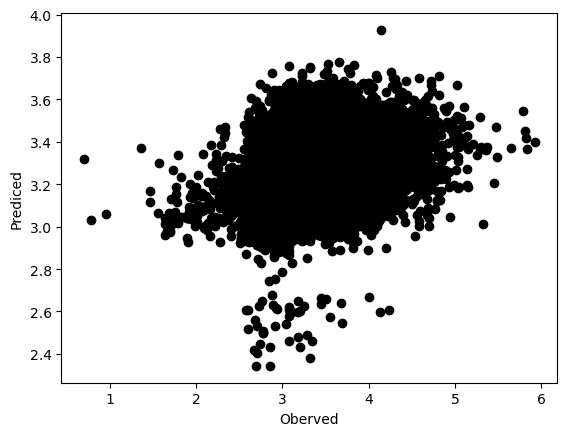

In [30]:
plt.scatter(news_shares_train, lmodel.predict(news_features_train), color='black')
plt.xlabel('Oberved')
plt.ylabel('Prediced')

Similarly, let's look at the performance of the model on the test data set.

Text(0, 0.5, 'Prediced')

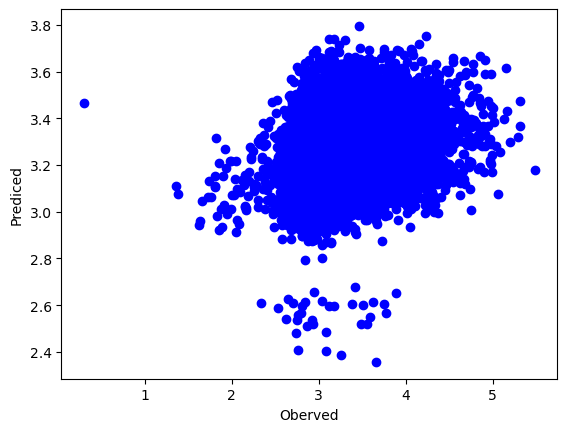

In [31]:
plt.scatter(news_shares_test, lmodel.predict(news_features_test), color='blue')
plt.xlabel('Oberved')
plt.ylabel('Prediced')

**COEFFICIENT OF VARIATION R-SAQUARED**  
Is a metric often used in regression problems, which defines **how much of the variation in the response is explained by the variation in the predictors** according to the model. The visual similarities are confirmed by looking this metric.

We need the variance and covariance of the two variables, observed response $y$ and the predicted response given by $y\beta$.  
<br>
- Perfect score = 1, straight line
- no correlation = 0, between a predicted and observed value. i.e. would be an spherical cloud of points.

In [32]:
#training data
lmodel.score(news_features_train, news_shares_train)

0.12903488253983963

In [33]:
#test data
lmodel.score(news_features_test, news_shares_test)

0.1089777983279625

There is some relationship between the predicted and observed response captured in the "news article data", though we have room for imrpovement.

Which variables of our imputs are most important in the model?
So, we have to sort the coefficients of the model by their absolute magnitude.  
 - We will obtain the sorted positions of the coefficients.  
 - Then to re-order the column names using the new index.

In [34]:
order = np.argsort(abs(lmodel.coef_))[::-1]
news_trimmed_features.columns[order]

Index(['n_unique_tokens', 'n_non_stop_unique_tokens', 'n_non_stop_words',
       'kw_avg_avg', 'global_rate_positive_words',
       'self_reference_avg_sharess', 'global_subjectivity', 'LDA_02',
       'num_keywords', 'self_reference_max_shares', 'n_tokens_content',
       'LDA_03', 'LDA_01', 'data_channel_is_entertainment', 'num_hrefs',
       'num_self_hrefs', 'global_sentiment_polarity', 'kw_max_max',
       'is_weekend', 'rate_positive_words', 'LDA_04', 'average_token_length',
       'min_positive_polarity', 'data_channel_is_bus', 'data_channel_is_world',
       'num_videos', 'global_rate_negative_words', 'data_channel_is_lifestyle',
       'num_imgs', 'avg_positive_polarity', 'abs_title_subjectivity',
       'data_channel_is_socmed', 'n_tokens_title', 'kw_max_avg',
       'self_reference_min_shares', 'rate_negative_words',
       'title_sentiment_polarity', 'weekday_is_tuesday',
       'min_negative_polarity', 'weekday_is_wednesday',
       'max_positive_polarity', 'title_subjecti

We do not know the confidence interval for a given coefficient value, nor whether it is statistically significant, because there is no information on the variance of the parameter values.  
<br>
In fact, the **scikit-learn regression method does not calculate statistical significance measurements** and for this reason is better to use a different library **statsmodels**

**STATISTICAL SIGNIFICANCE OF REGRESSION OUTPUTS**  
We will use all the data rather than a train/test split.  

We have two options to fit the linear model: "api" and "formula.api".
> - Api method: Resembles the scikit-learn function call, except we get a lot more detailed output about the statistical significance of the model.
> - Formula.api method: We have to construct a string from the input data representing the formula for the linear model.

**API METHOD:**

In [35]:
results = sm.OLS(news_response, news_trimmed_features).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     98.80
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:26:56   Log-Likelihood:                -17704.
No. Observations:               39644   AIC:                         3.552e+04
Df Residuals:                   39587   BIC:                         3.601e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta                         0.0142      0.006      2.322      0.020       0.002       0.026
n_tokens_title                    0.0640      0.024      2.626      0.009       0.016       0.112
n_tokens_content                 -0.0897      0.020     -4.451      0.000      -0.129      -0.050
n_unique_tokens                  -1.3315      0.320     -4.164      0.000      -1.958      -0.705
n_non_stop_words                  0.8054      0.215      3.740      0.000       0.383       1.228
n_non_stop_unique_tokens          0.5612      0.233      2.411      0.016       0.105       1.017
num_hrefs                         0.0973      0.008     11.474      0.000       0.081       0.114
num_self_hrefs                   -0.1083      0.011     -9.649      0.000      -0.130      -0.086
num_imgs                          0.0487      0.006      7.981      0.000       0.037       0.061
num_videos                        0.0667      0.008      8.620      0.000       0.052       0.082
average_token_length             -0.2459      0.103     -2.390      0.017      -0.448      -0.044
num_keywords                      0.1209      0.024      5.130      0.000       0.075       0.167
data_channel_is_lifestyle        -0.0592      0.013     -4.545      0.000      -0.085      -0.034
data_channel_is_entertainment    -0.1166      0.008    -14.059      0.000      -0.133      -0.100
data_channel_is_bus              -0.0982      0.013     -7.829      0.000      -0.123      -0.074
data_channel_is_socmed            0.0496      0.012      4.049      0.000       0.026       0.074
data_channel_is_tech              0.0190      0.012      1.557      0.119      -0.005       0.043
data_channel_is_world            -0.0581      0.012     -4.702      0.000      -0.082      -0.034
kw_min_min                        0.0088      0.004      2.469      0.014       0.002       0.016
kw_max_min                        0.0170      0.005      3.260      0.001       0.007       0.027
kw_avg_min                       -0.0185      0.008     -2.433      0.015      -0.033      -0.004
kw_min_max                        0.0165      0.007      2.441      0.015       0.003       0.030
kw_max_max                       -0.0811      0.016     -5.173      0.000      -0.112      -0.050
kw_avg_max                       -0.0332      0.018     -1.822      0.069      -0.069       0.003
kw_min_avg                       -0.0267      0.008     -3.354      0.001      -0.042      -0.011
kw_max_avg                       -0.0745      0.022     -3.411      0.001      -0.117      -0.032
kw_avg_avg                        0.4550      0.033     13.937      0.000       0.391       0.519
self_reference_min_shares        -0.0408      0.010     -3.902      0.000      -0.061      -0.020
self_reference_max_shares        -0.1309     

- **Df Model = 56:** Independent elements in the model parameters. 57 columns, but last is fixed by the need to minimize the remaning error, so there are only 56 **degrees of freedom** overall.  
- **Df Residuals = 39587:** Number od independent pieces of information in the error estimates of the model. Recall, we obtain the errors by $y-X$. We only have up to $m$ ind.cols in $X$, where $m$ is the number of predictors. SO the estimate of the error has $n-1$ ind. elements, from which we substract another $m$ which is determined by the inputs, giving us $n-m-1$. 
- **Covariance Type = nonrobust:** Here we use **white noise** (a mean 0, normally distributed error), is possible to specified this type. i.e where tje error is correlated with the magnitude of the response.
- **Adj. R-squared = 0.119:** For models with larger numbers of parameters, we penaize the R2 by the amount of errir in the fit. This indicator is if we include more variables in a model, the $R^2$ increase ny simply having more Df. If we wish to fairly compare the $R^2$ for models with different numbers of parameters, then we use the formula of $R^{2}_{adj}$.  
- **F-statistic = 96.55:** Is used to compare (through a Chi-squared dist.) that any (cualquiera) of the regression coefficients are statistically different than $0$.
- **Prob (F-statistic) = 0.00:** The p-value (from the F-statistic), proves that the null hypothesis (that the coeff. are $0$ and the fit is no better than the intercept-only model) is true. 
- **Log-Likelihood = 73840.0:** Recall that we assume the error of the residuals in the linear model is normally distributed. To determine how well fits this assumptions, we can coompute with its own function. It can helps us to compare two models (i.e with different coeff.) Better goodness of fit is represented by a larger log likelihood. or a lower negative log likelihood.
<br>

> In practice, is better to minimize the (-) log likelihood instead of maximizing. In this project assume minimization as the default objective.  

- **AIC = -1.476e+05 / BIC = -1.471e+05:** Stands for Akaike Information Criterion and Bayes Information Criterion. These help to compare models with different numbers of coefficients, thus gibing a sense of benefit of greater model complexity from addign more features.  
> AIC = $2m - 2\log(L(\beta))$: m is the number of coeff in the model and L is the likelihood. Better goodness of fit is represented by lower AIC. Thus, increasing the number of parameters penalizes the model, while improving the likelihood that it decreases the AIC. BIC is similar, but uses the formula $-2L(\beta) + \log(n)$. When n is the number of data points in the model.  

>So, If AIC has the lowest value for a corresponding model, it indicates a better fit compared to other models. In the same way if in the evaluation one model has the lowest BIC value, that indicates a better fit compared to other models.  

- **Durbin-Watson = 1.931:** This statistic asks whether the residuals are positively or negatively correlated. If its value is >2, this suggests a positive correlation. Values between 1 and 2 indicate little to correlation, with 2 indicating no correlation. Values less than 1 represent negative correlation between successive residuals.

**FORMULA.API METHOD**  
By constructing a string from the input data representing the formula for the linear model.

In [36]:
model_formula = news_response.name+" ~ "+" + ".join(news_trimmed_features.columns)

In [37]:
model_formula

'shares ~ timedelta + n_tokens_title + n_tokens_content + n_unique_tokens + n_non_stop_words + n_non_stop_unique_tokens + num_hrefs + num_self_hrefs + num_imgs + num_videos + average_token_length + num_keywords + data_channel_is_lifestyle + data_channel_is_entertainment + data_channel_is_bus + data_channel_is_socmed + data_channel_is_tech + data_channel_is_world + kw_min_min + kw_max_min + kw_avg_min + kw_min_max + kw_max_max + kw_avg_max + kw_min_avg + kw_max_avg + kw_avg_avg + self_reference_min_shares + self_reference_max_shares + self_reference_avg_sharess + weekday_is_monday + weekday_is_tuesday + weekday_is_wednesday + weekday_is_thursday + weekday_is_friday + weekday_is_saturday + is_weekend + LDA_01 + LDA_02 + LDA_03 + LDA_04 + global_subjectivity + global_sentiment_polarity + global_rate_positive_words + global_rate_negative_words + rate_positive_words + rate_negative_words + avg_positive_polarity + min_positive_polarity + max_positive_polarity + avg_negative_polarity + min_ne

Also we can use pandas, and calling the ols method of the formula API we imported previously:

In [38]:
news_all_data = pd.concat([news_trimmed_features,news_response],axis=1)

In [39]:
news_all_data

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,2.864511,1.113943,2.342423,0.221047,0.30103,0.258969,0.698970,0.477121,0.301030,0.000000,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,2.773786
1,2.864511,1.000000,2.408240,0.205406,0.30103,0.253325,0.602060,0.301030,0.301030,0.000000,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,2.852480
2,2.864511,1.000000,2.326336,0.197316,0.30103,0.221118,0.602060,0.301030,0.301030,0.000000,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,3.176381
3,2.864511,1.000000,2.725912,0.177187,0.30103,0.221580,1.000000,0.000000,0.301030,0.000000,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,3.079543
4,2.864511,1.146128,3.030600,0.150955,0.30103,0.187772,1.301030,1.301030,1.322219,0.000000,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,2.704151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.954243,1.079181,2.540329,0.184422,0.30103,0.226544,1.000000,0.903090,0.301030,0.301030,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,3.255514
39640,0.954243,1.113943,2.517196,0.229502,0.30103,0.275325,1.000000,0.903090,0.602060,1.690196,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,3.278982
39641,0.954243,1.041393,2.646404,0.180801,0.30103,0.215936,1.397940,0.301030,1.113943,0.301030,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,3.278982
39642,0.954243,0.845098,2.834421,0.187378,0.30103,0.228570,1.041393,0.301030,0.301030,0.000000,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,3.041787


In [40]:
results = smf.ols(formula=model_formula,data=news_all_data).fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     98.80
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:34:48   Log-Likelihood:                -17704.
No. Observations:               39644   AIC:                         3.552e+04
Df Residuals:                   39587   BIC:                         3.601e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

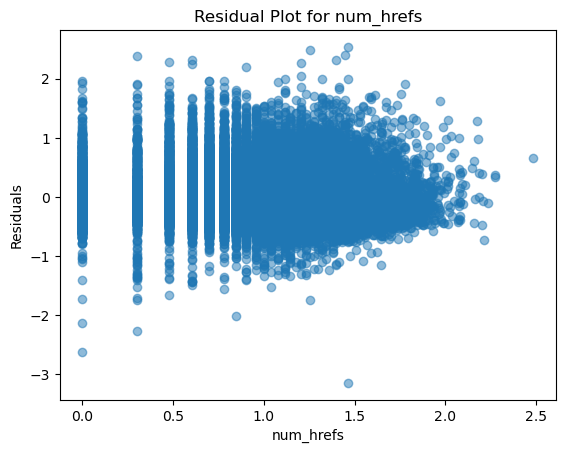

In [44]:
# Extracting the independent variable of interest and residuals
independent_variable = news_all_data['num_hrefs']
residuals = results.resid
plt.scatter(independent_variable, residuals, alpha=0.5)
plt.title('Residual Plot for num_hrefs')
plt.xlabel('num_hrefs')
plt.ylabel('Residuals')
plt.show()

In this example, it seems reasonable to assume that the residuals of the model we fit for popularity as a function of new item characteristics are independent. 
In other cases, we might make multiple observations on the same set of entries (as when a given customer appears more than once in a dataset), and these data might be correlated over time (as when records for the same customer are more likely to be correlated when they appear closer together in time). Both situations violate the assumptions of independence between the residuals of a model. In the following sections we will present three methods to deal with these cases.